In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = r"C:\Users\Jennie\Desktop\aiffel\Datathon\linear_regression\amazon_imdb_to_tmdb_prediction.csv"
amazon = pd.read_csv(data_dir)

In [124]:
# imdb와 tmdb score가 둘 중 하나 NaN값인 경우 서로 채워주기
"""
print(amazon['imdb_score'].isnull().sum())
amazon['imdb_score'] = amazon['imdb_score'].fillna(amazon['tmdb_score'])
print(amazon['imdb_score'].isnull().sum())

print(amazon['tmdb_score'].isnull().sum())
amazon['tmdb_score'] = amazon['tmdb_score'].fillna(amazon['imdb_score'])
print(amazon['tmdb_score'].isnull().sum())
"""
print(amazon['tmdb_score'].isnull().sum())
amazon_interpol_1 = amazon['tmdb_score'].fillna(amazon['imdb_score'])
print(amazon_interpol_1.isnull().sum())

1530
0


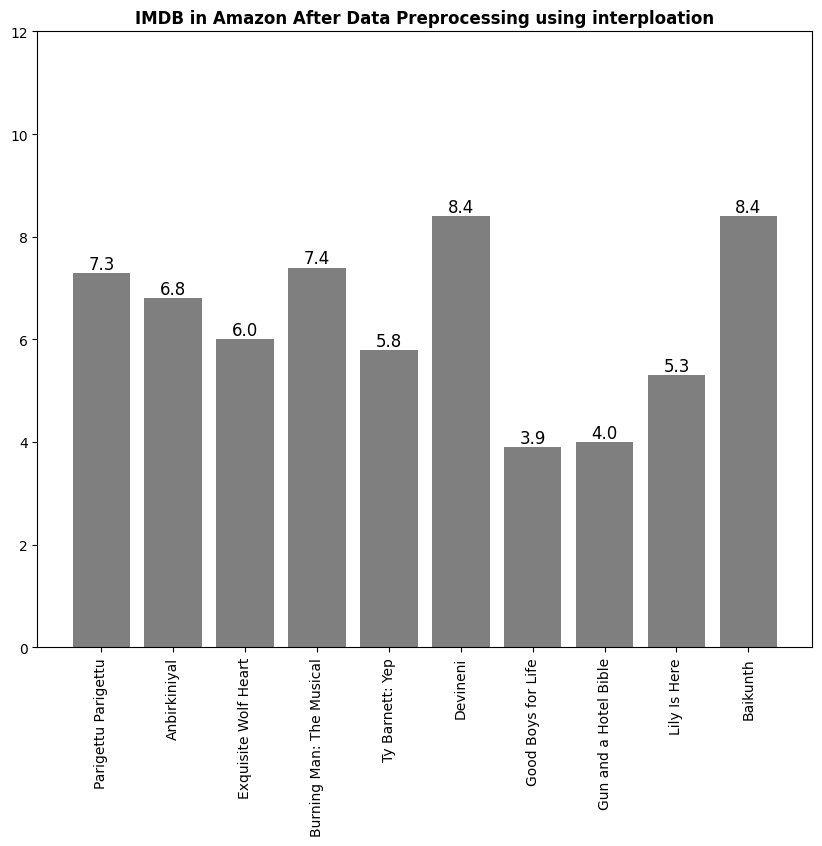

In [119]:
fig = plt.figure(figsize=(10,8))

x = amazon.tail(10)['title']
y = amazon.tail(10)['imdb_score']
bar = plt.bar(x, y, color='black', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("IMDB in Amazon After Data Preprocessing using interploation",fontweight="bold")

plt.show()

In [126]:
"""
print(amazon['imdb_score'].isnull().sum())
amazon['imdb_score'] = amazon['imdb_score'].fillna(amazon['prediction'])
print(amazon['imdb_score'].isnull().sum())

print(amazon['tmdb_score'].isnull().sum())
amazon['tmdb_score'] = amazon['tmdb_score'].fillna(amazon['prediction'])
print(amazon['tmdb_score'].isnull().sum())
"""
print(amazon['tmdb_score'].isnull().sum())
amazon_interpol_2 = amazon['tmdb_score'].fillna(amazon['prediction'])
print(amazon_interpol_2.isnull().sum())


1530
0


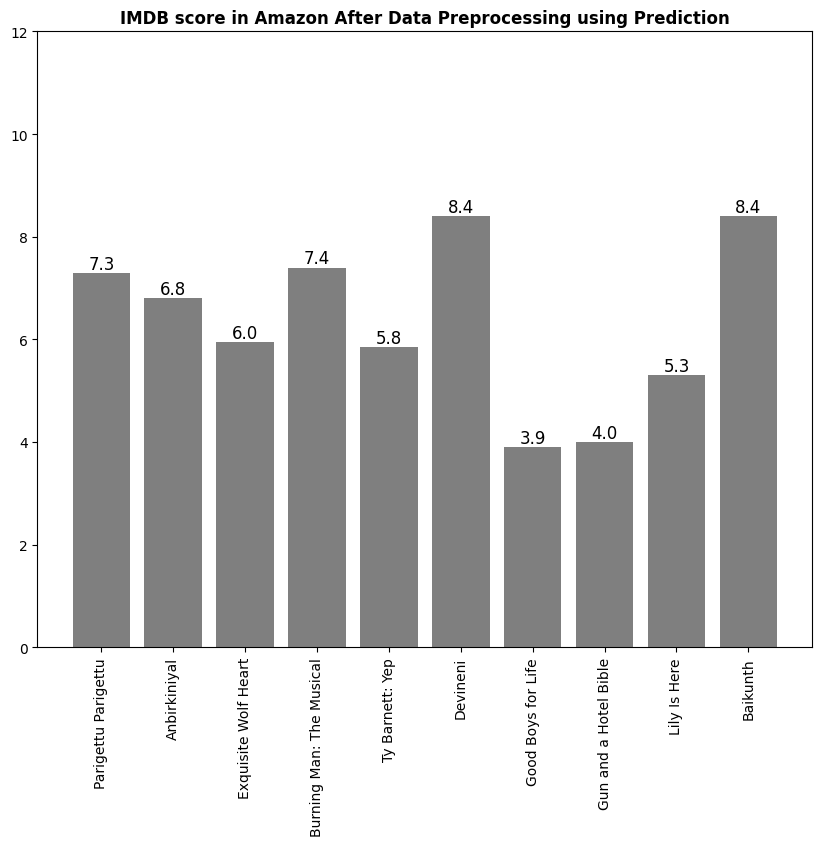

In [122]:
fig = plt.figure(figsize=(10,8))

x = amazon.tail(10)['title']
y = amazon.tail(10)['imdb_score']
bar = plt.bar(x, y, color='black', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("IMDB score in Amazon After Data Preprocessing using Prediction",fontweight="bold")

plt.show()

In [129]:
print(amazon_interpol_1.shape) # 점수 끌어다가 보간한 것
amazon_interpol_1 = amazon_interpol_1.sort_values(ascending=True)
print(amazon_interpol_2.shape) # prediction
amazon_interpol_2 = amazon_interpol_2.sort_values(ascending=True)

(9319,)
(9319,)


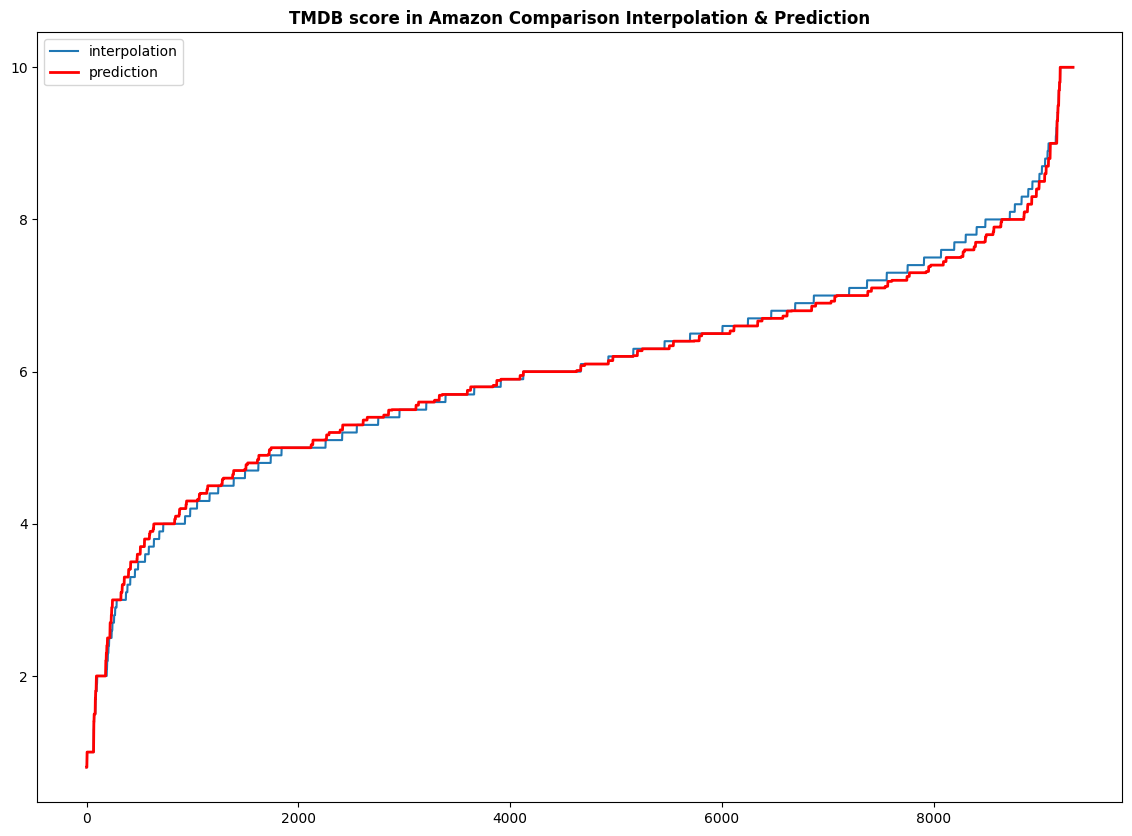

In [143]:
plt.figure(figsize=(14,10))
plt.plot(amazon_interpol_1.values, label='interpolation', linewidth=1.5)
plt.plot(amazon_interpol_2.values, c = 'r',label = 'prediction', linewidth=2.0)
plt.title("TMDB score in Amazon Comparison Interpolation & Prediction",fontweight="bold")
plt.legend()